In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
project_dir = Path("__file__").resolve().parents[2]
project_dir

PosixPath('/Users/b1017579/Documents/PhD/Projects/14-temporal-granularity/temporal_granularity')

In [4]:
wind = pd.read_csv('{}/data/processed/resources/wind_processed.csv'.format(project_dir))
wind.head()

,Unnamed: 0,time,offshore,onshore
0,0,1980-01-01 00:00:00,0.2858,0.1496
1,1,1980-01-01 01:00:00,0.2827,0.1502
2,2,1980-01-01 02:00:00,0.2852,0.1485
3,3,1980-01-01 03:00:00,0.2920,0.1470
4,4,1980-01-01 04:00:00,0.3039,0.1489


In [6]:
wind = wind.drop("Unnamed: 0", axis=1)
wind.head()

,time,offshore,onshore
0,1980-01-01 00:00:00,0.2858,0.1496
1,1980-01-01 01:00:00,0.2827,0.1502
2,1980-01-01 02:00:00,0.2852,0.1485
3,1980-01-01 03:00:00,0.2920,0.1470
4,1980-01-01 04:00:00,0.3039,0.1489


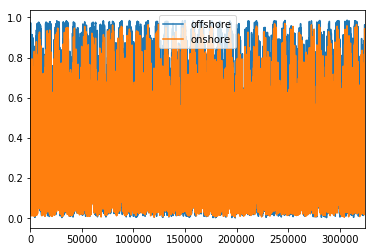

In [7]:
wind.plot()

In [10]:
wind.time = pd.to_datetime(wind.time)
wind_subset = wind[wind.time > "2010"]
wind_subset.head()

,time,offshore,onshore
262969,2010-01-01 01:00:00,0.4913,0.2208
262970,2010-01-01 02:00:00,0.4752,0.2307
262971,2010-01-01 03:00:00,0.4601,0.2423
262972,2010-01-01 04:00:00,0.4401,0.2540
262973,2010-01-01 05:00:00,0.4136,0.2539


In [12]:
wind_subset['date'] = wind_subset['time'].dt.date
wind_subset['hour'] = wind_subset['time'].dt.hour
wind_subset.head()

/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/b1017579/.pyenv/versions/3.6.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,time,offshore,onshore,date,hour
262969,2010-01-01 01:00:00,0.4913,0.2208,2010-01-01,1
262970,2010-01-01 02:00:00,0.4752,0.2307,2010-01-01,2
262971,2010-01-01 03:00:00,0.4601,0.2423,2010-01-01,3
262972,2010-01-01 04:00:00,0.4401,0.2540,2010-01-01,4
262973,2010-01-01 05:00:00,0.4136,0.2539,2010-01-01,5


In [13]:
each_day = wind_subset.pivot(index='date', columns='hour', values='offshore')
each_day = each_day.dropna()
each_day.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2010-01-02,0.2136,0.2379,0.2707,0.3203,0.3757,0.4129,0.4367,0.4378,0.4287,0.3945,...,0.3007,0.3667,0.4373,0.4798,0.5095,0.5531,0.5379,0.5015,0.4592,0.4290
2010-01-03,0.4132,0.4241,0.4520,0.4696,0.4612,0.4320,0.3871,0.3337,0.2812,0.2204,...,0.0548,0.0581,0.0714,0.0831,0.0886,0.0840,0.0751,0.0648,0.0570,0.0584
2010-01-04,0.0697,0.0887,0.1103,0.1358,0.1594,0.1794,0.1974,0.2116,0.2236,0.2125,...,0.2317,0.2577,0.2761,0.2818,0.2806,0.2758,0.2810,0.2952,0.3079,0.3178
2010-01-05,0.3224,0.3226,0.2961,0.2686,0.2734,0.2992,0.3235,0.3389,0.3332,0.3111,...,0.2022,0.2094,0.2245,0.2333,0.2374,0.2421,0.2535,0.2632,0.2757,0.2896
2010-01-06,0.3026,0.3135,0.3270,0.3474,0.3614,0.3833,0.4035,0.4134,0.4245,0.4344,...,0.3629,0.3709,0.3972,0.4307,0.4549,0.4665,0.4703,0.4485,0.4188,0.4085


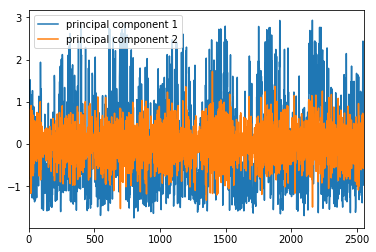

In [15]:
# Visualise as PCA
pca = PCA(n_components=2)

pca_results = pca.fit_transform(each_day)

principal_df = pd.DataFrame(data = pca_results, columns = ['principal component 1', 'principal component 2'])
principal_df.plot()

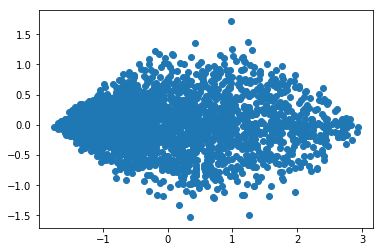

In [17]:
plt.scatter(principal_df['principal component 1'],principal_df['principal component 2'])

t-SNE

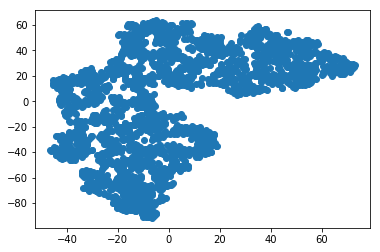

In [19]:
tsne = TSNE(n_components=2, random_state=0, n_iter=2000, early_exaggeration=4)
each_day_2d = tsne.fit_transform(each_day)

plt.scatter(each_day_2d[:,0], each_day_2d[:,1])
plt.show()